# Task Purpose : Prediction using Unsupervised ML

This notebook will walk through some of the basics of K-Means Clustering.

● Problem statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

● Methodology: 
k-Mean clustering algorithm with Elbow Method.

● Data Source:  https://bit.ly/3kXTdox OR use "sklearn.datasets.load_iris()"

Step 1 - Importing the libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Step 2 - Load the Dataset

In [92]:
iris = sns.load_dataset('iris')

Step 3 - EDA

In [93]:
#to See the first 10 rows
iris .head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [95]:
#to find the count of column and count of rows
rows,columns=iris.shape

In [96]:
rows #in the dataset we have 150 rows

150

In [97]:
columns #and we have 5 columns

5

In [98]:
#Check for Column name, nun-null-count and datatype, 
iris .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [101]:
#Check for null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [102]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [109]:
# Finding the optimum number of clusters for k-means classification
# Segrgate the independent and dependent features
X = iris.drop(['species'],axis=1)
X = X.values

In [130]:
from sklearn.cluster import KMeans

In [131]:
wcss = []                                  # Within Cluster Sum of Squares (WCSS)

for i in range(1, 12):
    KMeans_model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    KMeans_model.fit(X)
    wcss.append(KMeans_model.inertia_)

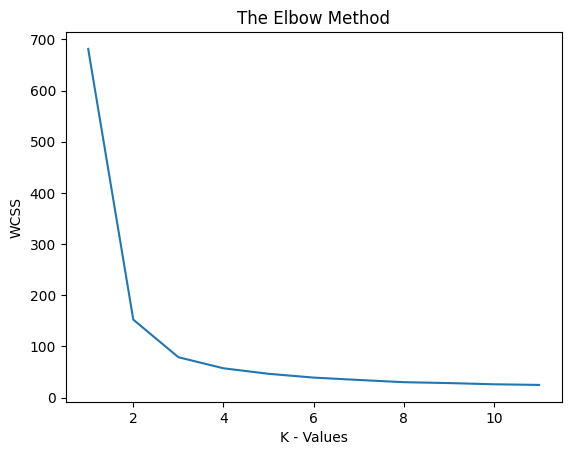

In [132]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('K - Values')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [133]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [134]:
y_label = kmeans.fit_predict(X)

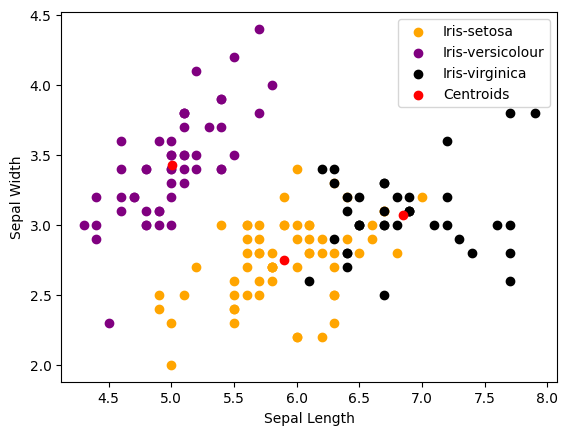

In [135]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_label == 0, 0], X[y_label == 0, 1], 
             c = 'orange', label = 'Iris-setosa')
plt.scatter(X[y_label == 1, 0], X[y_label == 1, 1], 
             c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[y_label == 2, 0], X[y_label == 2, 1],
             c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
             c = 'red', label = 'Centroids')

plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

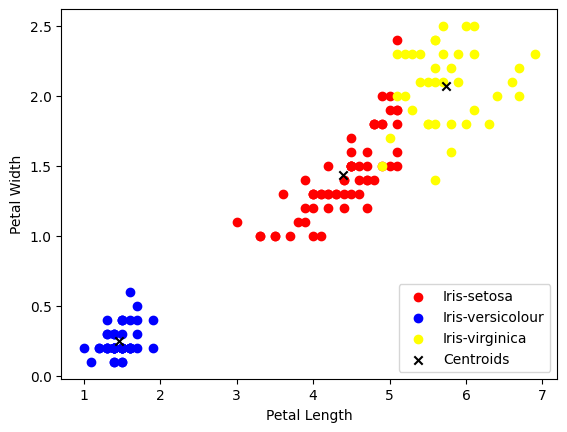

In [137]:
# Visualising the clusters - On the last two columns

plt.scatter(X[y_label == 0, 2], X[y_label == 0, 3], 
            c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_label == 1, 2], X[y_label == 1, 3], 
            c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_label == 2, 2], X[y_label == 2, -1],
            c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            c = 'k', label = 'Centroids', marker = 'x')
            
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Conclusion:
We are able to predict the optimum number of clusters i.e 3 and also visualize them with the help of scatter plot.

# Thank You!

# Author Details: Fahad Baig

Linkedin: https://www.linkedin.com/in/fahad-baig-04b06b224/ 

Github: https://github.com/Fb1402/Spark_Foundation_Internship